In [3]:
import time

import pandas as pd
import requests


def NIFTY():
    # URL for fetching data
    URL = "https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"

    # Header file.
    header = {
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    }

    session = requests.session()

    data = session.get(url=URL, headers=header).json()["records"]["data"]
    records = session.get(url=URL, headers=header).json()["records"]

    # For calculating Expiry Date
    # print("Date: ", records["expiryDates"][0])

    df = pd.DataFrame(data)
    print(df)

    # Call European
    CE_data = []
    PE_data = []
    for i in range(len(df)):
        if df["expiryDate"][i] == records["expiryDates"][0]:
            CE_data.append(df["CE"][i])
            PE_data.append(df["PE"][i])

    max_OI_CE = -10000000
    change_at_max_OI_CE = 0
    strike_price_CE = 0
    open_CE = []

    # Calculating open Interest of CE
    for i in CE_data:
        value = i["openInterest"]
        open_CE.append(value)
        if value > max_OI_CE:
            max_OI_CE = value
            change_at_max_OI_CE = i["changeinOpenInterest"]
            strike_price_CE = i["strikePrice"]
    open_CE.sort()

    # Put European
    max_OI_PE = -10000000
    change_at_max_OI_PE = 0
    strike_price_PE = 0
    open_PE = []

    # Calculating open Interest of PE
    for i in PE_data:
        value = i["openInterest"]
        open_PE.append(i["openInterest"])
        if value > max_OI_PE:
            max_OI_PE = value
            change_at_max_OI_PE = i["changeinOpenInterest"]
            strike_price_PE = i["strikePrice"]

    open_PE.sort()

    # Taking only top 20 Values of OI
    open_PE = open_PE[-20:]
    open_CE = open_CE[-20:]

    # Finding total CE and PE
    total_OI_CE = 0
    for i in open_CE:
        total_OI_CE += i

    total_OI_PE = 0
    for i in open_PE:
        total_OI_PE += i

    # Putting all the values in a list
    all_value = [
        max_OI_CE,
        change_at_max_OI_CE,
        strike_price_CE,
        total_OI_PE / total_OI_CE,
        max_OI_PE,
        change_at_max_OI_PE,
        strike_price_PE,
    ]
    return all_value

    print(
        f"Call: ({all_value[0]}, {all_value[1]}, {all_value[2]}) :: PCR-> {all_value[3]} ::  Put: ({all_value[4]}, {all_value[5]}, {all_value[6]})"
    )


def BANKNIFTY():
    # URL for fetching data
    URL = "https://www.nseindia.com/api/option-chain-indices?symbol=BANKNIFTY"

    # Header file.
    header = {
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    }

    session = requests.session()

    data = session.get(url=URL, headers=header).json()["records"]["data"]
    records = session.get(url=URL, headers=header).json()["records"]

    # For calculating Expiry Date
    # print("Date: ", records["expiryDates"][0])

    df = pd.DataFrame(data)

    # Call European
    CE_data = []
    PE_data = []
    for i in range(len(df)):
        if df["expiryDate"][i] == records["expiryDates"][0]:
            CE_data.append(df["CE"][i])
            PE_data.append(df["PE"][i])

    max_OI_CE = -10000000
    change_at_max_OI_CE = 0
    strike_price_CE = 0
    open_CE = []

    # Calculating open Interest of CE
    for i in CE_data:
        value = i["openInterest"]
        open_CE.append(value)
        if value > max_OI_CE:
            max_OI_CE = value
            change_at_max_OI_CE = i["changeinOpenInterest"]
            strike_price_CE = i["strikePrice"]
    open_CE.sort()

    # Put European
    max_OI_PE = -10000000
    change_at_max_OI_PE = 0
    strike_price_PE = 0
    open_PE = []

    # Calculating open Interest of PE
    for i in PE_data:
        value = i["openInterest"]
        open_PE.append(i["openInterest"])
        if value > max_OI_PE:
            max_OI_PE = value
            change_at_max_OI_PE = i["changeinOpenInterest"]
            strike_price_PE = i["strikePrice"]

    open_PE.sort()

    # Taking only top 20 Values of OI
    open_PE = open_PE[-20:]
    open_CE = open_CE[-20:]

    # Finding total CE and PE
    total_OI_CE = 0
    for i in open_CE:
        total_OI_CE += i

    total_OI_PE = 0
    for i in open_PE:
        total_OI_PE += i

    # Putting all the values in a list
    all_value = [
        max_OI_CE,
        change_at_max_OI_CE,
        strike_price_CE,
        total_OI_PE / total_OI_CE,
        max_OI_PE,
        change_at_max_OI_PE,
        strike_price_PE,
    ]
    return all_value

    print(
        f"Call: ({all_value[0]}, {all_value[1]}, {all_value[2]}) :: PCR-> {all_value[3]} ::  Put: ({all_value[4]}, {all_value[5]}, {all_value[6]})"
    )


if __name__ == "__main__":
    while True:
        nifty_value = NIFTY()
        banknifty_values = BANKNIFTY()

        # Printing
        print(
            f"Call: ({nifty_value[0]}, {nifty_value[1]}, {nifty_value[2]}) :: PCR-> {nifty_value[3]} ::  Put: ({nifty_value[4]}, {nifty_value[5]}, {nifty_value[6]})",
            end=" *** ",
        )
        print(
            f"Call: ({banknifty_values[0]}, {banknifty_values[1]}, {banknifty_values[2]}) :: PCR-> {banknifty_values[3]} ::  Put: ({banknifty_values[4]}, {banknifty_values[5]}, {banknifty_values[6]})"
        )
        time.sleep(60)

Call: (513758, 263177, 19600) :: PCR-> 0.8750477389638276 ::  Put: (375327, 319026, 19500) *** Call: (719386, 466142, 45000) :: PCR-> 1.0763000464733992 ::  Put: (630920, 595205, 44600)


KeyboardInterrupt: 

In [34]:
import time

import pandas as pd
import requests


def NIFTY():
    # URL for fetching data
    URL = "https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"

    # Header file.
    header = {
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    }

    session = requests.session()

    data = session.get(url=URL, headers=header).json()["records"]["data"]
    records = session.get(url=URL, headers=header).json()["records"]

    # For calculating Expiry Date
    # print("Date: ", records["expiryDates"][0])

    df = pd.DataFrame(data)

    # Call European
    CE_data = []
    PE_data = []
    for i in range(len(df)):
        if df["expiryDate"][i] == records["expiryDates"][0]:
            CE_data.append(df["CE"][i])
            PE_data.append(df["PE"][i])

    max_OI_CE = -10000000
    change_at_max_OI_CE = 0
    strike_price_CE = 0
    open_CE = []

    # Calculating open Interest of CE
    for i in CE_data:
        value = i["openInterest"]
        open_CE.append(value)
        if value > max_OI_CE:
            max_OI_CE = value
            change_at_max_OI_CE = i["changeinOpenInterest"]
            strike_price_CE = i["strikePrice"]
    open_CE.sort()

    # Put European
    max_OI_PE = -10000000
    change_at_max_OI_PE = 0
    strike_price_PE = 0
    open_PE = []

    # Calculating open Interest of PE
    for i in PE_data:
        value = i["openInterest"]
        open_PE.append(i["openInterest"])
        if value > max_OI_PE:
            max_OI_PE = value
            change_at_max_OI_PE = i["changeinOpenInterest"]
            strike_price_PE = i["strikePrice"]

    open_PE.sort()

    # Taking only top 20 Values of OI
    open_PE = open_PE[-20:]
    open_CE = open_CE[-20:]

    # Finding total CE and PE
    total_OI_CE = 0
    for i in open_CE:
        total_OI_CE += i

    total_OI_PE = 0
    for i in open_PE:
        total_OI_PE += i

    # Putting all the values in a list
    all_value = [
        max_OI_CE,
        change_at_max_OI_CE,
        strike_price_CE,
        total_OI_PE / total_OI_CE,
        max_OI_PE,
        change_at_max_OI_PE,
        strike_price_PE,
    ]
    return all_value

    print(
        f"Call: ({all_value[0]}, {all_value[1]}, {all_value[2]}) :: PCR-> {all_value[3]} ::  Put: ({all_value[4]}, {all_value[5]}, {all_value[6]})"
    )


def BANKNIFTY():
    # URL for fetching data
    URL = "https://www.nseindia.com/api/option-chain-indices?symbol=BANKNIFTY"

    # Header file.
    header = {
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    }

    session = requests.session()

    data = session.get(url=URL, headers=header).json()["records"]["data"]
    records = session.get(url=URL, headers=header).json()["records"]

    # For calculating Expiry Date
    # print("Date: ", records["expiryDates"][0])

    df = pd.DataFrame(data)
    
    # Call European
    CE_data = []
    PE_data = []
    for i in range(len(df)):
        if df["expiryDate"][i] == records["expiryDates"][0]:
            CE_data.append(df["CE"][i])
            PE_data.append(df["PE"][i])

    max_OI_CE = -10000000
    change_at_max_OI_CE = 0
    strike_price_CE = 0
    open_CE = []

    # Calculating open Interest of CE
    for i in CE_data:
        value = i["openInterest"]
        open_CE.append(value)
        if value > max_OI_CE:
            max_OI_CE = value
            change_at_max_OI_CE = i["changeinOpenInterest"]
            strike_price_CE = i["strikePrice"]
    open_CE.sort()

    # Put European
    max_OI_PE = -10000000
    change_at_max_OI_PE = 0
    strike_price_PE = 0
    open_PE = []

    # Calculating open Interest of PE
    for i in PE_data:
        value = i["openInterest"]
        open_PE.append(i["openInterest"])
        if value > max_OI_PE:
            max_OI_PE = value
            change_at_max_OI_PE = i["changeinOpenInterest"]
            strike_price_PE = i["strikePrice"]

    open_PE.sort()

    # Taking only top 20 Values of OI
    open_PE = open_PE[-20:]
    open_CE = open_CE[-20:]

    # Finding total CE and PE
    total_OI_CE = 0
    for i in open_CE:
        total_OI_CE += i

    total_OI_PE = 0
    for i in open_PE:
        total_OI_PE += i

    # Putting all the values in a list
    all_value = [
        max_OI_CE,
        change_at_max_OI_CE,
        strike_price_CE,
        total_OI_PE / total_OI_CE,
        max_OI_PE,
        change_at_max_OI_PE,
        strike_price_PE,
    ]
    return all_value

    print(
        f"Call: ({all_value[0]}, {all_value[1]}, {all_value[2]}) :: PCR-> {all_value[3]} ::  Put: ({all_value[4]}, {all_value[5]}, {all_value[6]})"
    )

In [35]:
# if __name__ == "__main__":
#     while True:
#         nifty_value = NIFTY()
#         banknifty_values = BANKNIFTY()

#         # Printing
#         print(
#             f"Call: ({nifty_value[0]}, {nifty_value[1]}, {nifty_value[2]}) :: PCR-> {nifty_value[3]} ::  Put: ({nifty_value[4]}, {nifty_value[5]}, {nifty_value[6]})",
#             end=" *** ",
#         )
#         print(
#             f"Call: ({banknifty_values[0]}, {banknifty_values[1]}, {banknifty_values[2]}) :: PCR-> {banknifty_values[3]} ::  Put: ({banknifty_values[4]}, {banknifty_values[5]}, {banknifty_values[6]})"
#         )
#         time.sleep(60)
        
        
nifty_value = NIFTY()
banknifty_values = BANKNIFTY()

# Printing
print(
    f"Call: ({nifty_value[0]}, {nifty_value[1]}, {nifty_value[2]}) :: PCR-> {nifty_value[3]} ::  Put: ({nifty_value[4]}, {nifty_value[5]}, {nifty_value[6]})",
    end=" *** ",
)
print(
    f"Call: ({banknifty_values[0]}, {banknifty_values[1]}, {banknifty_values[2]}) :: PCR-> {banknifty_values[3]} ::  Put: ({banknifty_values[4]}, {banknifty_values[5]}, {banknifty_values[6]})"
)

   strikePrice   expiryDate  \
0        31500  28-Sep-2023   
1        33000  28-Sep-2023   
2        33000  28-Dec-2023   
3        34500  28-Sep-2023   
4        36000  28-Sep-2023   

                                                  PE  \
0  {'strikePrice': 31500, 'expiryDate': '28-Sep-2...   
1  {'strikePrice': 33000, 'expiryDate': '28-Sep-2...   
2  {'strikePrice': 33000, 'expiryDate': '28-Dec-2...   
3  {'strikePrice': 34500, 'expiryDate': '28-Sep-2...   
4  {'strikePrice': 36000, 'expiryDate': '28-Sep-2...   

                                                  CE  
0  {'strikePrice': 31500, 'expiryDate': '28-Sep-2...  
1  {'strikePrice': 33000, 'expiryDate': '28-Sep-2...  
2                                                NaN  
3  {'strikePrice': 34500, 'expiryDate': '28-Sep-2...  
4  {'strikePrice': 36000, 'expiryDate': '28-Sep-2...  
        strikePrice
count    574.000000
mean   44544.773519
std     3247.176064
min    31500.000000
25%    42500.000000
50%    44500.000000
75%   

In [55]:
import statistics
import time

In [56]:
def get_ce_pe_data(ticker_symbol):
    # URL for fetching data
    URL = f"https://www.nseindia.com/api/option-chain-indices?symbol={ticker_symbol}"
    # Header file.
    header = {
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    }
    
    session = requests.session()
    
    data = session.get(url=URL, headers=header).json()["records"]["data"]
    records = session.get(url=URL, headers=header).json()["records"]
    
    df = pd.DataFrame(data)
    
    CE_data = []
    PE_data = []
    
    for i in range(len(df)):
        if df["expiryDate"][i] == records["expiryDates"][0]:
            CE_data.append(df["CE"][i])
            PE_data.append(df["PE"][i])
            
    return CE_data, PE_data

In [57]:
def calculate_open_interest_change(data):
    open_interest_changes = [entry['changeinOpenInterest'] for entry in data]
    avg_open_interest_change = statistics.mean(open_interest_changes)
    return avg_open_interest_change

def calculate_implied_volatility(data):
    implied_volatilities = [entry['impliedVolatility'] for entry in data]
    avg_implied_volatility = statistics.mean(implied_volatilities)
    return avg_implied_volatility

def calculate_vwap(data):
    total_price_volume = sum(entry['lastPrice'] * entry['totalTradedVolume'] for entry in data)
    total_volume = sum(entry['totalTradedVolume'] for entry in data)
    vwap = total_price_volume / total_volume
    return vwap

def calculate_bid_ask_spread(data):
    bid_ask_spreads = [(entry['askPrice'] - entry['bidprice']) for entry in data]
    avg_bid_ask_spread = statistics.mean(bid_ask_spreads)
    return avg_bid_ask_spread

def calculate_total_buy_sell_quantity(data):
    total_buy_quantities = [entry['totalBuyQuantity'] for entry in data]
    total_sell_quantities = [entry['totalSellQuantity'] for entry in data]
    avg_total_buy_quantity = statistics.mean(total_buy_quantities)
    avg_total_sell_quantity = statistics.mean(total_sell_quantities)
    return avg_total_buy_quantity, avg_total_sell_quantity

def calculate_price_and_volume_trends(data):
    price_changes = [entry['change'] for entry in data]
    volume_changes = [entry['totalTradedVolume'] for entry in data]
    return price_changes, volume_changes

def calculate_put_call_ratio(data):
    total_put_volumes = sum(entry['totalTradedVolume'] for entry in data)
    total_call_volumes = sum(entry['totalTradedVolume'] for entry in data)
    put_call_ratio = total_put_volumes / total_call_volumes
    return put_call_ratio

def calculate_rsi(data):
    price_changes = [entry['change'] for entry in data]
    gains = [change for change in price_changes if change > 0]
    losses = [abs(change) for change in price_changes if change < 0]
    avg_gain = statistics.mean(gains)
    avg_loss = statistics.mean(losses)
    relative_strength = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + relative_strength))
    return rsi

def calculate_moving_average(data):
    prices = [entry['lastPrice'] for entry in data]
    moving_average = statistics.mean(prices)
    return moving_average

def calculate_options_spreads(data):
    # Example: calculate spread for CE and PE options
    ce_bid_price = CE_data[0]['bidprice']
    pe_ask_price = PE_data[0]['askPrice']
    spread = pe_ask_price - ce_bid_price
    return spread

In [58]:
import matplotlib.pyplot as plt

def plot_changes(ticker, price_changes, volume_changes):
    # Plotting Price Changes
    plt.figure(figsize=(10, 6))
    plt.plot(price_changes, marker='o', linestyle='-', color='b', label=f'{ticker} Price Changes')
    plt.xlabel('Time')
    plt.ylabel('Price Change')
    plt.title(f'{ticker} Option Price Changes Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plotting Volume Changes
    plt.figure(figsize=(10, 6))
    plt.plot(volume_changes, marker='o', linestyle='-', color='r', label=f'{ticker} Volume Changes')
    plt.xlabel('Time')
    plt.ylabel('Volume Change')
    plt.title(f'{ticker} Option Volume Changes Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

Call Option
CE Open Interest Change: 9013.66
CE Implied Volatility: 9.26
CE VWAP: 36.36
Bid-Ask Spread (CE): 21.80
Total Buy Quantity (CE): 217852.11
Put-Call Ratio: 1.00
RSI (CE): 0.16
Moving Average (CE): 504.16
Options Spread: -2414.15


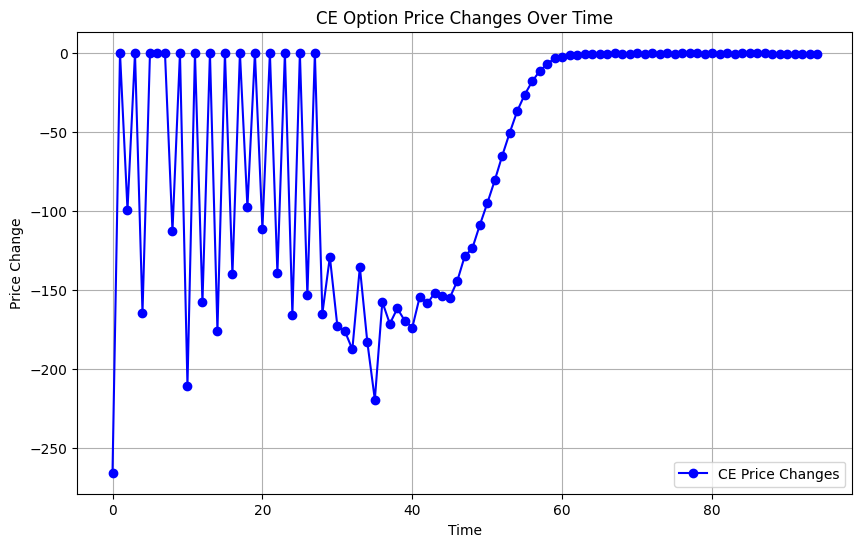

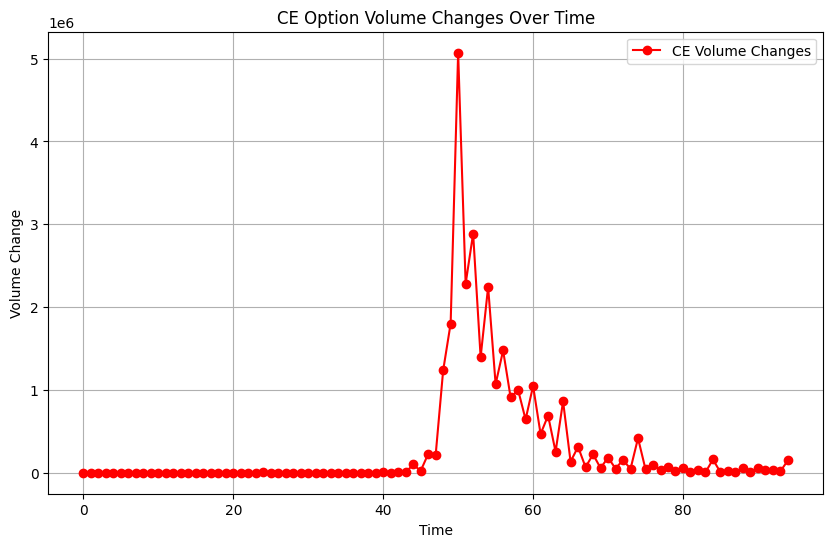

Put Option
PE Open Interest Change: 2852.44
PE Implied Volatility: 21.81
PE VWAP: 84.39
Bid-Ask Spread (PE): 19.79
Total Sell Quantity (CE): 129348.42
Put-Call Ratio: 1.00
RSI (PE): 99.47
Moving Average (PE): 397.62
Options Spread: -2414.15


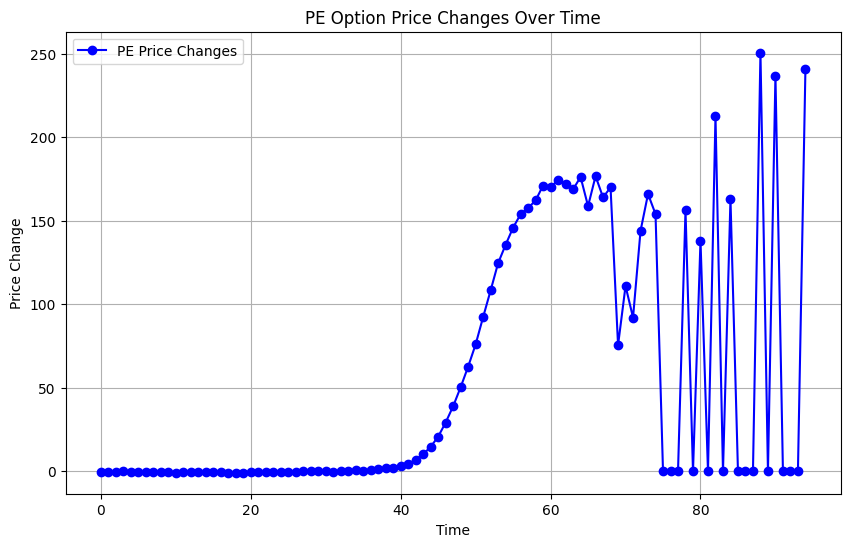

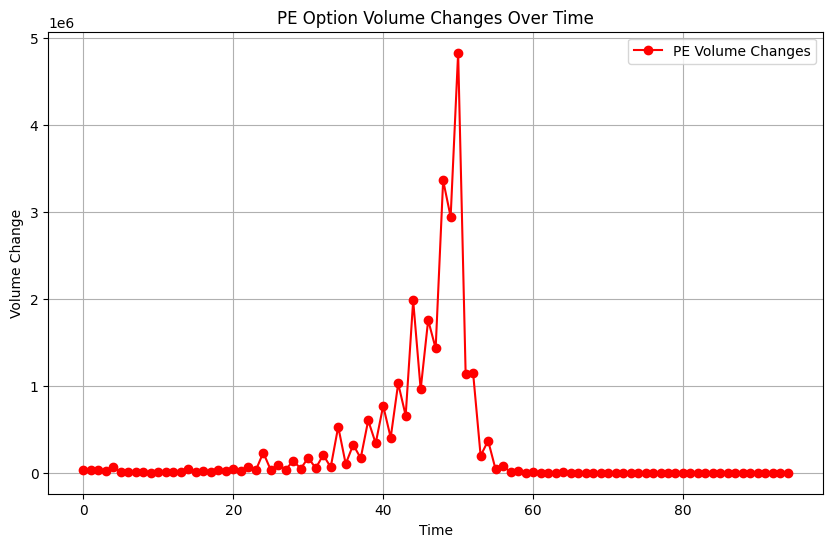

---------- Break ---------


In [61]:
while True:
    
    CE_data, PE_data = get_ce_pe_data("NIFTY")
    
    ce_open_interest_change = calculate_open_interest_change(CE_data)
    pe_open_interest_change = calculate_open_interest_change(PE_data)
    
    ce_implied_volatility = calculate_implied_volatility(CE_data)
    pe_implied_volatility = calculate_implied_volatility(PE_data)
    
    ce_vwap = calculate_vwap(CE_data)
    pe_vwap = calculate_vwap(PE_data)
    
    bid_ask_spread_ce = calculate_bid_ask_spread(CE_data)
    bid_ask_spread_pe = calculate_bid_ask_spread(PE_data)
    
    total_buy_quantity_ce, total_sell_quantity_ce = calculate_total_buy_sell_quantity(CE_data)
    total_buy_quantity_pe, total_sell_quantity_pe = calculate_total_buy_sell_quantity(PE_data)
    
    price_changes_ce, volume_changes_ce = calculate_price_and_volume_trends(CE_data)
    price_changes_pe, volume_changes_pe = calculate_price_and_volume_trends(PE_data)
    
    put_call_ratio = calculate_put_call_ratio(PE_data)
    
    rsi_ce = calculate_rsi(CE_data)
    rsi_pe = calculate_rsi(PE_data)
    
    moving_average_ce = calculate_moving_average(CE_data)
    moving_average_pe = calculate_moving_average(PE_data)
    
    
    print("Call Option")
    print(f"CE Open Interest Change: {ce_open_interest_change:.2f}")
    print(f"CE Implied Volatility: {ce_implied_volatility:.2f}")
    print(f"CE VWAP: {ce_vwap:.2f}")
    print(f"Bid-Ask Spread (CE): {bid_ask_spread_ce:.2f}")
    print(f"Total Buy Quantity (CE): {total_buy_quantity_ce:.2f}")
    print(f"Put-Call Ratio: {calculate_put_call_ratio(CE_data):.2f}")
    print(f"RSI (CE): {rsi_ce:.2f}")
    print(f"Moving Average (CE): {moving_average_ce:.2f}")
    print(f"Options Spread: {calculate_options_spreads(CE_data):.2f}")  
    plot_changes("CE", price_changes_ce, volume_changes_ce)
    
    print("Put Option")
    print(f"PE Open Interest Change: {pe_open_interest_change:.2f}")
    print(f"PE Implied Volatility: {pe_implied_volatility:.2f}") 
    print(f"PE VWAP: {pe_vwap:.2f}")  
    print(f"Bid-Ask Spread (PE): {bid_ask_spread_pe:.2f}")   
    print(f"Total Sell Quantity (CE): {total_sell_quantity_ce:.2f}")  
    print(f"Put-Call Ratio: {calculate_put_call_ratio(PE_data):.2f}")   
    print(f"RSI (PE): {rsi_pe:.2f}")  
    print(f"Moving Average (PE): {moving_average_pe:.2f}")   
    print(f"Options Spread: {calculate_options_spreads(PE_data):.2f}")  
    plot_changes("PE", price_changes_pe, volume_changes_pe)
    
    print("---------- Break ---------")
    
    break
    
    
#     time.sleep(300)  # Wait for 5 minutes